<a href="https://colab.research.google.com/github/Aitslab/SOPs/blob/main/CDLAI_SOP_Keras_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CDLAI Standard Operating Procedure**
# Keras - Regression

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping

# Prepare the data

In [4]:
# Load data into dataframe

data='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv' # Example dataset from IBM Introduction to Deep Learning course https://www.coursera.org/learn/introduction-to-deep-learning-with-keras/
df = pd.read_csv(data)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# Define columns with predictor variables and target
target = df['Strength'] # Define target
predictors = df[df.columns[df.columns != 'Strength']] # Define predictors (all except target)

In [16]:
# Normalize the predictors
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [42]:
# Split into Train, Dev and Test set

# First, split into Train (80%) and Dev+Test set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(predictors_norm, target, test_size=0.2, random_state=42)

# Then, split the temporary set into validation (10%) and test (10%)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [43]:
# Compare the composition of the generated datasets
print("Training set:")
print(X_train.describe())
print(y_train.describe())
print("\nDevelopment set:")
print(X_dev.describe())
print(y_dev.describe())
print("\nTest set:")
print(X_test.describe())
print(y_test.describe())

Training set:
           Cement  Blast Furnace Slag     Fly Ash       Water  \
count  824.000000          824.000000  824.000000  824.000000   
mean     0.020984            0.005514   -0.016056    0.010762   
std      1.028994            1.008095    1.000057    0.998487   
min     -1.714421           -0.856472   -0.846733   -2.798851   
25%     -0.853229           -0.856472   -0.846733   -0.780515   
50%     -0.058062           -0.601486   -0.846733    0.177142   
75%      0.753372            0.821508    1.001791    0.488555   
max      2.476712            3.309068    2.200285    3.064159   

       Superplasticizer  Coarse Aggregate  Fine Aggregate         Age  
count        824.000000        824.000000      824.000000  824.000000  
mean          -0.006814          0.008097       -0.018373   -0.015842  
std            0.998898          1.012098        1.010087    0.957350  
min           -1.038638         -2.211064       -2.239829   -0.707016  
25%           -1.038638         -0.52626

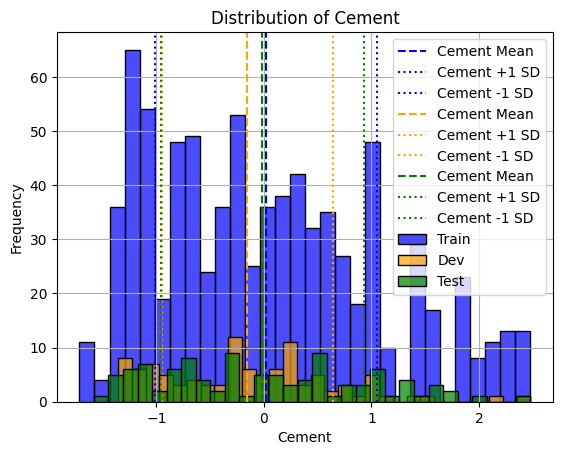

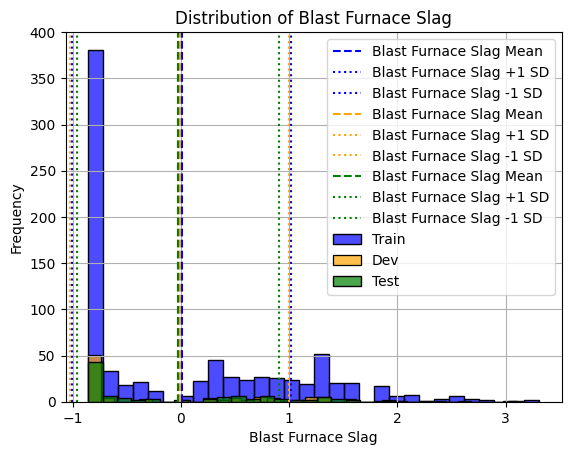

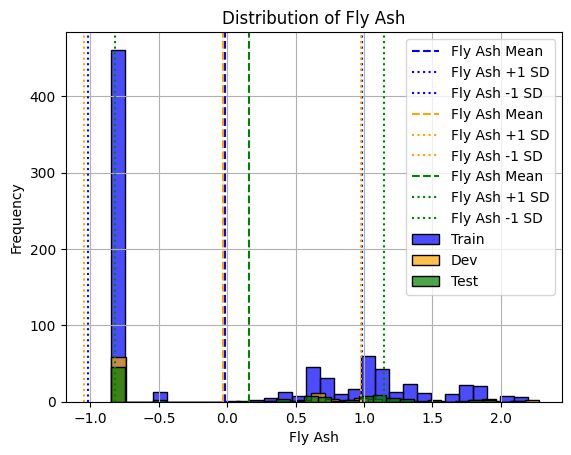

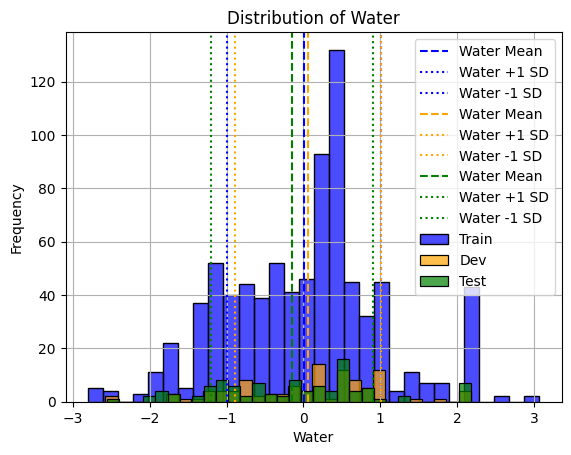

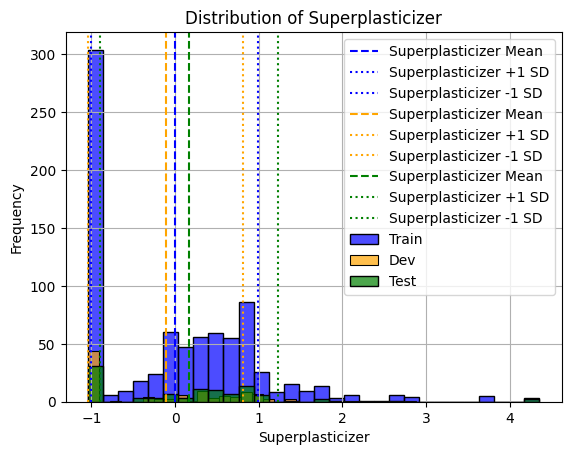

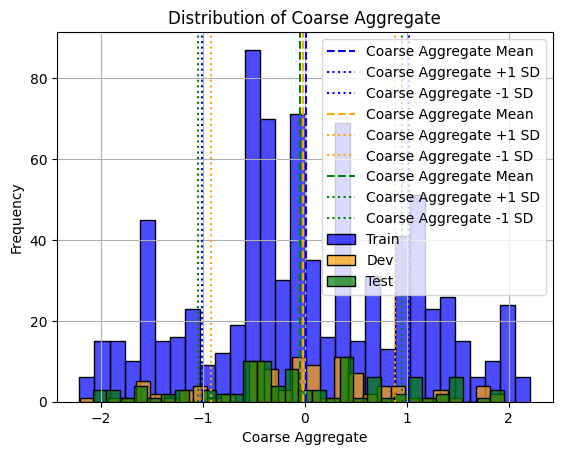

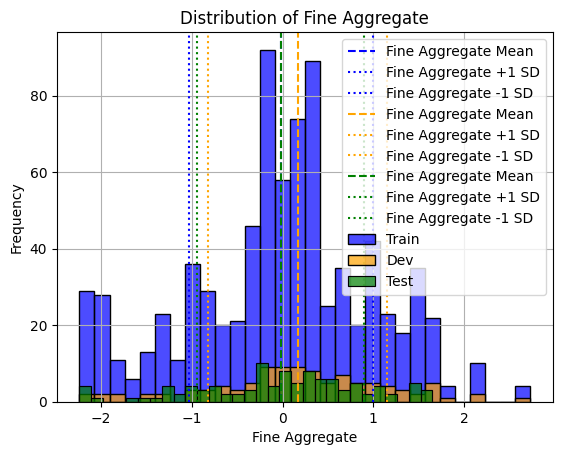

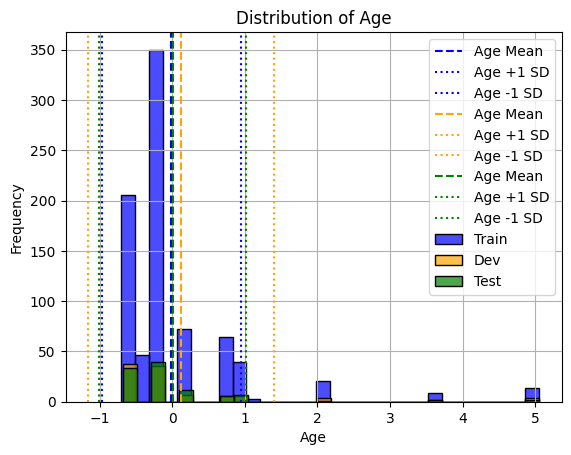

In [67]:
for feature in predictors_norm.columns:

    # Plot histograms for each dataset
    sns.histplot(X_train[feature], kde=False, bins=30, color=colors['_train'], label='Train', alpha=0.7)
    sns.histplot(X_dev[feature], kde=False, bins=30, color=colors['_dev'], label='Dev', alpha=0.7)
    sns.histplot(X_test[feature], kde=False, bins=30, color=colors['_test'], label='Test', alpha=0.7)

    # Add lines for mean and standard deviation
    for dataset, color, col in [(X_train, 'blue', feature),
                                (X_dev, 'orange', feature),
                                (X_test, 'green', feature)]:
        mean = dataset[col].mean()
        std = dataset[col].std()
        plt.axvline(mean, color=color, linestyle='--', label=f'{col.split("_")[-1]} Mean')
        plt.axvline(mean + std, color=color, linestyle=':', label=f'{col.split("_")[-1]} +1 SD')
        plt.axvline(mean - std, color=color, linestyle=':', label=f'{col.split("_")[-1]} -1 SD')

    # Add title and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


# Define the model

In [82]:
def regression_model():
    model = Sequential()
    model.add(Input(shape=((len(predictors_norm.columns),)))) # Input layer with one node per predictor
    model.add(Dense(30, activation='relu')) # Hidden layer 1 with 30 nodes
    model.add(Dense(30, activation='relu')) # Hidden layer 2 with 30 nodes
    model.add(Dense(1)) # Output layer

    model.compile(
    optimizer='adam',
    loss='mse',  # Main loss function
    metrics=['mae']  # Include Mean Absolute Error as a metric
)
    return model

# Train the model

Epoch 1/100
26/26 - 1s - 47ms/step - loss: 1531.6112 - mae: 35.3780 - val_loss: 1263.1542 - val_mae: 31.9318
Epoch 2/100
26/26 - 0s - 6ms/step - loss: 1451.9982 - mae: 34.2947 - val_loss: 1175.0007 - val_mae: 30.6104
Epoch 3/100
26/26 - 0s - 6ms/step - loss: 1324.9749 - mae: 32.5106 - val_loss: 1029.8909 - val_mae: 28.3200
Epoch 4/100
26/26 - 0s - 5ms/step - loss: 1123.6455 - mae: 29.5227 - val_loss: 818.8619 - val_mae: 24.7639
Epoch 5/100
26/26 - 0s - 5ms/step - loss: 859.8812 - mae: 25.0162 - val_loss: 565.9488 - val_mae: 19.9912
Epoch 6/100
26/26 - 0s - 5ms/step - loss: 578.9862 - mae: 19.5731 - val_loss: 348.0262 - val_mae: 14.8539
Epoch 7/100
26/26 - 0s - 4ms/step - loss: 369.6703 - mae: 15.1536 - val_loss: 219.2258 - val_mae: 11.7795
Epoch 8/100
26/26 - 0s - 6ms/step - loss: 262.8961 - mae: 12.9066 - val_loss: 173.2379 - val_mae: 10.6776
Epoch 9/100
26/26 - 0s - 4ms/step - loss: 222.7570 - mae: 11.9682 - val_loss: 157.4624 - val_mae: 10.1679
Epoch 10/100
26/26 - 0s - 6ms/step - l

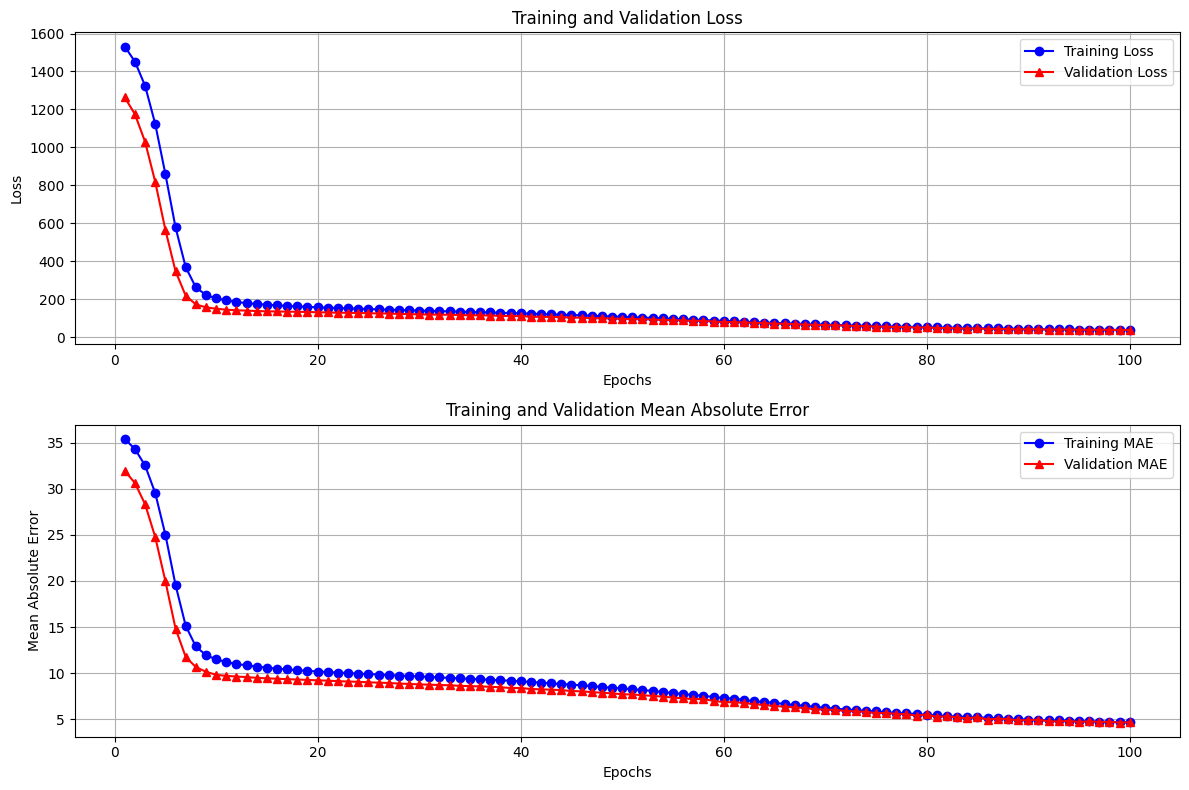

In [83]:
# Create model
model = regression_model()

# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor the validation loss
    patience=10,               # Number of epochs with no improvement to stop
    restore_best_weights=True  # Restore the best weights after stopping
)

# Train the model
history = model.fit(
    X_train, y_train,              # Training data
    validation_data=(X_dev, y_dev),  # Development data
    epochs=100,                    # Number of epochs
    verbose=2,                     # Display progress
    callbacks=[early_stopping]     # Include the early stopping callback
)

# Plot metrics
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
mae = history_dict['mae']
val_mae = history_dict['val_mae']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 8))

# Plot Loss
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot MAE
plt.subplot(2, 1, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'r^-', label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()